In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

/home/duc/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/duc/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/duc/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/duc/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: 

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [6]:
def resize_keep_ratio(img, size=32, interpolation=cv.INTER_AREA):
        # get height and width of given image
        h, w = img.shape[:2]
        c = None if len(img.shape) < 3 else img.shape[2]
        if h == w:
            return cv.resize(img, (size, size), interpolation)
        # get longest edge
        dif = max(h, w)
        # calculate offsets
        xOffset = int((dif-w)/2.)
        yOffset = int((dif-h)/2.)
        # generate mask with longest edge and offsets
        if c is None:
            mask = np.zeros((dif, dif), dtype=img.dtype)
            mask[yOffset:yOffset+h, xOffset:xOffset+w] = img[:h, :w]
        else:
            mask = np.zeros((dif, dif, c), dtype=img.dtype)
            mask[yOffset:yOffset+h, xOffset:xOffset+w,
                 :] = img[:h, :w, :] = img[:h, :w, :]
        # return resized mask
        resized = cv.resize(mask, (size, size), interpolation)
        return resized

def convert_gray(img):
    return cv.cvtColor(img, cv.COLOR_BGR2GRAY)

def erode(img):
    kernel = np.ones((3, 3), np.uint8)
    return cv.erode(img, kernel, iterations=1)

def gaussian_blur(img):
    return cv.GaussianBlur(img, (7, 7), 0)

def morph_open(img):
    kernel = np.ones((3, 3), np.uint8)
    return cv.morphologyEx(img, cv.MORPH_OPEN, kernel, iterations=1)

def binarize(img):
    # adaptive gaussian thresholding
    binarized = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv.THRESH_BINARY, 11, 2)
    return binarized

def preprocess(img):
    preprocessed = convert_gray(img)
    preprocessed = gaussian_blur(preprocessed)
    preprocessed = binarize(preprocessed)
    return preprocessed

def convert(img):
    converted = resize_keep_ratio(img)
    converted = cv.cvtColor(converted, cv.COLOR_GRAY2BGR)
    converted = cv.bitwise_not(converted)
    converted = preprocess(converted)
    converted = converted.reshape((1,32,32))
    return converted

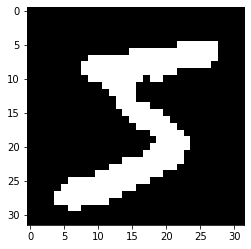

In [7]:
x_train_processed = []
for i in range(len(x_train)):
    curr = x_train[i]
    x_train_processed.append(convert(curr))

x_train_processed = np.array(x_train_processed)

np.save('mnist_x_train', x_train_processed)

x_test_processed = []
for i in range(len(x_test)):
    curr = x_test[i]
    x_test_processed.append(convert(curr))

x_test_processed = np.array(x_test_processed)

np.save("minst_x_test", x_test_processed)  
